In [2]:
import graphviz
import numpy as np
import pandas as pd
from sklearn import tree
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.tree import export_graphviz
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [3]:
df=pd.read_csv("final_anime_dataset.csv")

df.head()

,Serial No.,Name,Links,Genre and Theme,No. of episodes,TV show,Genre: magic,Genre: adventure,Genre: psychological,Genre: comedy,Genre: drama,Genre: romance,Genre: mystery,Genre: action,Genre: fantasy,Rating
0,1,Fullmetal Alchemist: Brotherhood (TV),https://www.animenewsnetwork.com//encyclopedia...,"adventure,comedy,drama,fantasy,thriller,alchem...",64,1,0,1,0,1,1,0,0,0,1,9.09
1,2,Steins;Gate (TV),https://www.animenewsnetwork.com//encyclopedia...,"adventure,comedy,drama,mystery,psychological,r...",24,1,0,1,1,1,1,1,1,0,0,9.04
2,3,Clannad After Story (TV),https://www.animenewsnetwork.com//encyclopedia...,"comedy,drama,psychological,romance,supernatura...",25,1,0,0,1,1,1,1,0,0,0,9.04
3,4,your name. (movie),https://www.animenewsnetwork.com//encyclopedia...,"comedy,drama,romance,supernatural,amnesia,body...",1,0,0,0,0,1,1,1,0,0,0,9.02
4,5,Rurouni Kenshin: Trust &amp; Betrayal (OAV),https://www.animenewsnetwork.com//encyclopedia...,"action,drama,romance,historical,revenge,samura...",4,1,0,0,0,0,1,1,0,1,0,8.97


Train/Test-split

In [4]:
X = df[['TV show','Genre: magic', 'Genre: adventure', 'Genre: psychological',
       'Genre: comedy', 'Genre: drama', 'Genre: romance', 'Genre: mystery',
       'Genre: action', 'Genre: fantasy']]
Y = df['Rating']

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2)

Training of model and evaluation

In [5]:
DT = DecisionTreeRegressor(random_state=42)
DT.fit(X_train, y_train)
y_pred = DT.predict(X_test)
score = mean_squared_error(y_test, y_pred)
print("Mean Squared Error: " + str(score))

Mean Squared Error: 0.045680188888888765


[Text(0.6630208333333333, 0.9444444444444444, 'x[3] <= 0.5\nsquared_error = 0.033\nsamples = 80\nvalue = 8.59'),
 Text(0.4239583333333333, 0.8333333333333334, 'x[4] <= 0.5\nsquared_error = 0.027\nsamples = 62\nvalue = 8.561'),
 Text(0.5434895833333333, 0.8888888888888888, 'True  '),
 Text(0.28541666666666665, 0.7222222222222222, 'x[9] <= 0.5\nsquared_error = 0.025\nsamples = 37\nvalue = 8.539'),
 Text(0.15416666666666667, 0.6111111111111112, 'x[0] <= 0.5\nsquared_error = 0.024\nsamples = 30\nvalue = 8.551'),
 Text(0.06666666666666667, 0.5, 'x[8] <= 0.5\nsquared_error = 0.009\nsamples = 8\nvalue = 8.499'),
 Text(0.03333333333333333, 0.3888888888888889, 'x[6] <= 0.5\nsquared_error = 0.008\nsamples = 5\nvalue = 8.542'),
 Text(0.016666666666666666, 0.2777777777777778, 'squared_error = 0.013\nsamples = 2\nvalue = 8.545'),
 Text(0.05, 0.2777777777777778, 'squared_error = 0.005\nsamples = 3\nvalue = 8.54'),
 Text(0.1, 0.3888888888888889, 'x[6] <= 0.5\nsquared_error = 0.001\nsamples = 3\nvalue

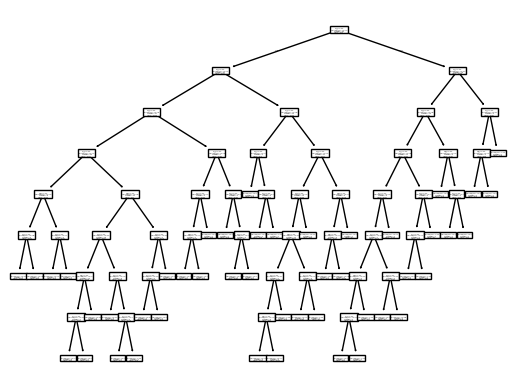

In [6]:
export_graphviz(DT, out_file='anime.dot', 
                class_names=True, 
                #class_names=['Negative', 'Positive'], 
                feature_names=X.columns,
                impurity=False,
                filled=True)
  
tree.plot_tree(DT)

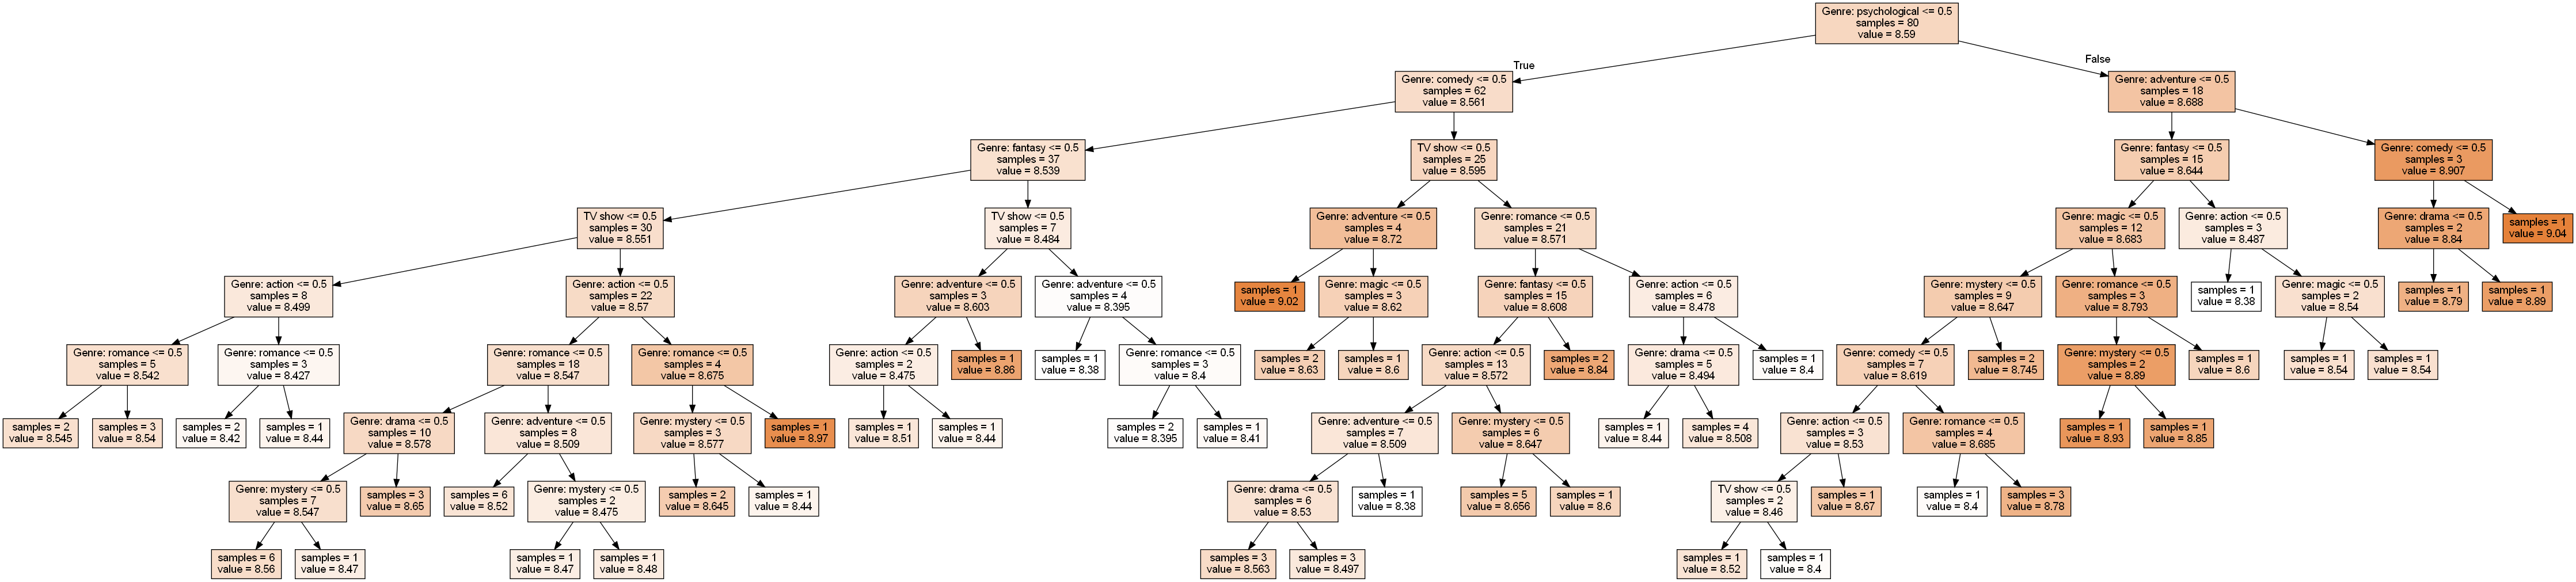

In [7]:
! dot -Tpng anime.dot -o anime.png

from IPython import display
display.Image("anime.png")

In [8]:
with open('anime.dot') as f:
    tree_graph = f.read()

graph = graphviz.Source(tree_graph)
# This render the .dot file into a PDF
graph.render("anime", view=True)

'anime.pdf'